#### Introduction

#### Import libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##### Load data

In [2]:
data = pd.read_csv("qsar_aquatic_toxicity.csv",sep=";")
data

,0,0.1,0.2,2.419,1.225,0.667,0.3,0.4,3.740
0,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
1,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
2,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
3,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
4,215.34,327.629,3,0.189,4.677,1.333,0,4,6.064
...,...,...,...,...,...,...,...,...,...
540,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
541,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
542,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
543,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


In [3]:
# Need to have header
data = pd.read_csv("qsar_aquatic_toxicity.csv",sep=";", names=['TPSA', 'SAacc', 'H-050', 'MLOGP', 'RDCHI', 'GATS1p', 'nN', 'C-040',
                          'quantitative response'])
data                         

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
0,0.00,0.000,0,2.419,1.225,0.667,0,0,3.740
1,0.00,0.000,0,2.638,1.401,0.632,0,0,4.330
2,9.23,11.000,0,5.799,2.930,0.486,0,0,7.019
3,9.23,11.000,0,5.453,2.887,0.495,0,0,6.723
4,9.23,11.000,0,4.068,2.758,0.695,0,0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2,3.326,2.837,0.849,2,0,4.651
542,9.23,11.000,0,3.275,2.727,0.874,0,0,3.953
543,0.00,0.000,0,5.165,3.111,0.732,0,0,6.219
544,13.14,9.507,0,2.859,2.614,0.827,0,0,4.995


#### Data information and characteristics

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 546 entries, 0 to 545
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   TPSA                   546 non-null    float64
 1   SAacc                  546 non-null    float64
 2   H-050                  546 non-null    int64  
 3   MLOGP                  546 non-null    float64
 4   RDCHI                  546 non-null    float64
 5   GATS1p                 546 non-null    float64
 6   nN                     546 non-null    int64  
 7   C-040                  546 non-null    int64  
 8   quantitative response  546 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 38.5 KB


,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,quantitative response
count,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000,546.000000
mean,48.472930,58.869018,0.937729,2.313493,2.492299,1.046264,1.003663,0.353480,4.658421
std,46.763983,68.166554,1.618632,1.741797,0.811004,0.403677,1.397240,0.806827,1.665215
min,0.000000,0.000000,0.000000,-6.446000,1.000000,0.281000,0.000000,0.000000,0.122000
25%,15.790000,11.000000,0.000000,1.232500,1.975000,0.737000,0.000000,0.000000,3.601500
50%,40.460000,42.683000,0.000000,2.273500,2.344000,1.020500,1.000000,0.000000,4.516000
75%,70.022500,77.492750,1.000000,3.392750,2.911000,1.266500,2.000000,0.000000,5.607500
max,347.320000,571.952000,18.000000,9.148000,6.439000,2.500000,11.000000,11.000000,10.047000


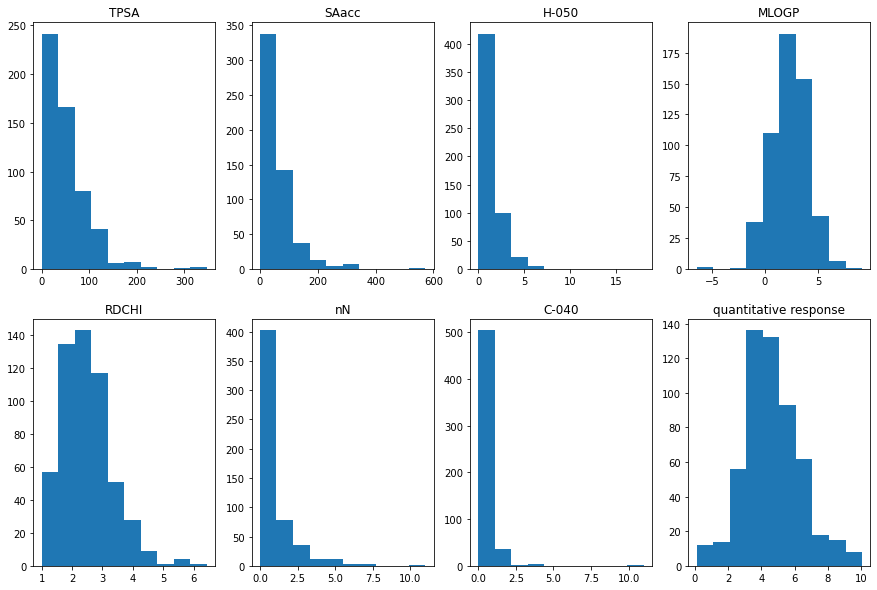

In [5]:
#Histogram Visualization
fig, axs = plt.subplots(2, 4, figsize=(15, 10))
axs[0,0].hist(data['TPSA'])
axs[0,0].set_title('TPSA')

axs[0,1].hist(data['SAacc'])
axs[0,1].set_title('SAacc')

axs[0,2].hist(data['H-050'])
axs[0,2].set_title('H-050')

axs[0,3].hist(data['MLOGP'])
axs[0,3].set_title('MLOGP')

axs[1,0].hist(data['RDCHI'])
axs[1,0].set_title('RDCHI')

axs[1,1].hist(data['nN'])
axs[1,1].set_title('nN')

axs[1,2].hist(data['C-040'])
axs[1,2].set_title('C-040')

axs[1,3].hist(data['quantitative response'])
axs[1,3].set_title('quantitative response')

plt.show()

In [6]:
#### Define a function to get the columns that do not have any missing values

def get_cols_with_no_nans(df,col_type):
    """
    Arguments :
    df : The dataframe to process
    col_type:
        num : to only get numerical columns with no nans
        no_num : to only get non-numerical columns with no nans
        all : to get any columns with no nans
     """ 
    if (col_type == 'num'):
        predictors = df.select_dtypes(exclude = ['object'])
    elif (col_type == 'no_num'):
        predictors = df.select_dtypes(include = ['object'])
    elif (col_type == 'all'):
        predictors = df
    else:
        print('Error : choose a type (num, no_num, all)')
        return 0
    cols_with_no_nans = []
    for col in predictors.columns:
        if not df[col].isnull().any():
            cols_with_no_nans.append(col)
    return cols_with_no_nans

In [7]:
# Get the columns that do not have any missing values

num_cols = get_cols_with_no_nans(data, 'num')
cat_cols = get_cols_with_no_nans(data, 'no_num')

In [8]:
# How many column we got?

print("Number of numerical columns with no nan values : ", len(num_cols))
print("Number of non-numberical columns with no nan values :", len(cat_cols))

Number of numerical columns with no nan values :  9
Number of non-numberical columns with no nan values : 0


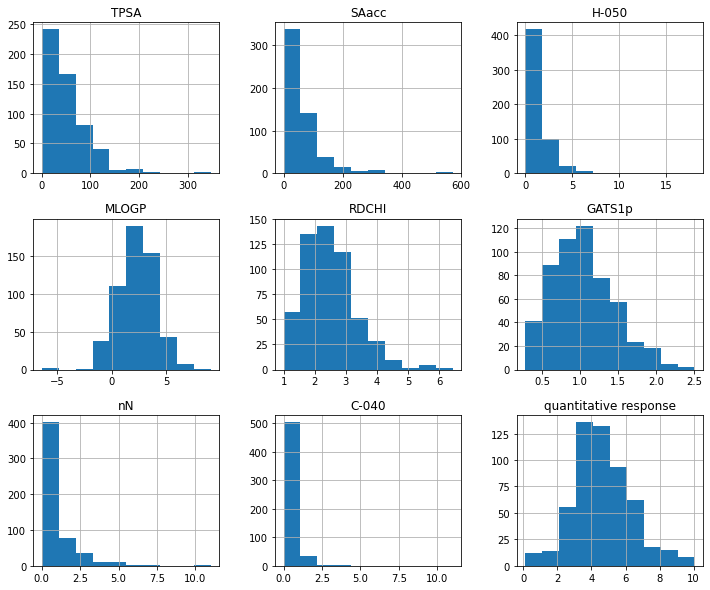

In [9]:
data = data[num_cols + cat_cols]
data.hist(figsize = (12,10))
plt.show()

In [10]:
# Split data : 70% of data for training and 30 % of data for data testing

x_train, x_test , y_train, y_test = train_test_split(data.drop(axis=0, columns='quantitative response'),
                                    data['quantitative response'], test_size=0.3)

print("Train: ",len(x_train))
print("Test :", len(x_test))

Train:  382
Test : 164


#### Train and test the models

In [11]:
lnr = LinearRegression()
mlp = MLPRegressor()

lnr.fit(x_train, y_train)
mlp.fit(x_train, y_train)

hasil_lnr = lnr.predict(x_test)
hasil_mlp = mlp.predict(x_test)

print("Mean Squared Error Linear Regression :", mean_squared_error(y_test, hasil_lnr))
print("Mean Squared Error Multilayer Perceptron :",mean_squared_error(y_test, hasil_mlp))

Mean Squared Error Linear Regression : 1.6303396315806669
Mean Squared Error Multilayer Perceptron : 1.856318409897038


/Users/zaw/miniforge3/envs/ds/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


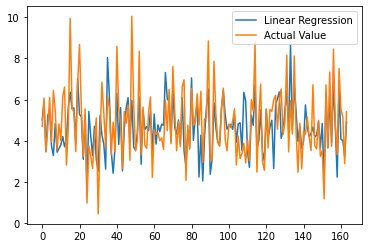

In [12]:
plt.plot(list(hasil_lnr), label ='Linear Regression')
plt.plot(list(y_test), label = 'Actual Value')

plt.legend(loc='upper right')

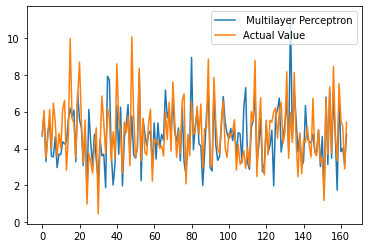

In [13]:
plt.plot(list(hasil_mlp), label = " Multilayer Perceptron")
plt.plot(list(y_test), label = 'Actual Value')
plt.legend(loc='upper right')

### Tensorflow

In [14]:
# Import library
from tensorflow.keras import Sequential, layers, optimizers

#### Model
Consists of : 8 nodes in the input layer 8 nodes in hidden layers 1 and 2 along with the activation function used is ReLU also 1 node in the output because this case is regression

In [15]:
def Simple_NN():
    model = Sequential([
    layers.Dense(8, activation = 'relu', input_shape =[8]),
    layers.Dense(8, activation = 'relu'),
    layers.Dense(1)
    ])

    optimizer = optimizers.RMSprop(0.001)
    model.compile(loss='mse', optimizer= optimizer, metrics = ['mae','mse'])
    return model
    

In [16]:
model = Simple_NN()
model.summary()

2022-07-19 17:25:18.133045: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-19 17:25:18.133454: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 72        
                                                                 
 dense_1 (Dense)             (None, 8)                 72        
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


#### Training Model

In [17]:
model.fit(x_train, y_train, epochs = 100, validation_split=0.2, verbose=1)

Epoch 1/100


2022-07-19 17:25:18.557007: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-19 17:25:18.819851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 2s 47ms/step - loss: 670.2499 - mae: 17.8759 - mse: 670.2499 - val_loss: 740.9340 - val_mae: 14.9820 - val_mse: 740.9340
Epoch 2/100
10/10 [==============================] - 0s 11ms/step - loss: 455.7002 - mae: 14.5677 - mse: 455.7002 - val_loss: 541.1929 - val_mae: 12.5651 - val_mse: 541.1929
Epoch 3/100
 1/10 [==>...........................] - ETA: 0s - loss: 371.1035 - mae: 14.2022 - mse: 371.1035

2022-07-19 17:25:20.127037: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 11ms/step - loss: 330.0622 - mae: 12.0471 - mse: 330.0622 - val_loss: 419.5783 - val_mae: 10.9057 - val_mse: 419.5783
Epoch 4/100
10/10 [==============================] - 0s 11ms/step - loss: 244.5053 - mae: 10.2342 - mse: 244.5053 - val_loss: 311.7916 - val_mae: 9.2595 - val_mse: 311.7916
Epoch 5/100
10/10 [==============================] - 0s 12ms/step - loss: 173.9524 - mae: 8.4945 - mse: 173.9524 - val_loss: 220.8817 - val_mae: 7.7253 - val_mse: 220.8817
Epoch 6/100
10/10 [==============================] - 0s 11ms/step - loss: 117.2612 - mae: 7.0412 - mse: 117.2612 - val_loss: 156.6292 - val_mae: 6.5181 - val_mse: 156.6292
Epoch 7/100
10/10 [==============================] - 0s 10ms/step - loss: 79.2766 - mae: 5.9097 - mse: 79.2766 - val_loss: 106.7814 - val_mae: 5.5736 - val_mse: 106.7814
Epoch 8/100
10/10 [==============================] - 0s 11ms/step - loss: 53.1736 - mae: 5.0582 - mse: 53.1736 - val_loss: 73.8035 - val_mae: 4.9794 - 

#### Testing model to predict the x_test

In [18]:
hasil_tf = model.predict(x_test)

hasil_tf.ravel()

2022-07-19 17:25:36.713593: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


array([ 6.0007243,  4.0321274,  3.6195588,  4.4843698,  4.099045 ,
        3.4243555,  3.9104538,  4.091621 ,  3.9228354,  5.3708086,
        2.9906816,  4.050402 ,  4.120209 ,  3.601244 ,  5.1476035,
        6.666966 ,  5.08586  ,  5.2023034,  3.2278147,  6.1883197,
        5.139132 ,  4.8758893,  2.626585 ,  4.839324 ,  1.5543927,
        4.4921308,  3.5726247,  3.2635798,  4.523083 ,  4.1045136,
        2.027029 ,  3.0202293,  2.6858554,  3.4548483,  2.3629518,
        7.6335645,  6.3098674,  3.323277 ,  2.6027012,  2.3870735,
        6.681377 ,  3.0086927,  4.3957677,  2.2934752,  4.4995112,
        5.8363023,  6.0942965,  3.0637932,  6.112576 ,  3.8396788,
        4.9460044,  3.6021247,  6.2727475,  1.8291239,  5.2991037,
        4.404567 ,  3.856779 ,  4.4015684,  4.9186826,  3.7262044,
        4.1008515,  3.3344698,  5.3501463,  3.6100502,  4.5549297,
        4.135941 ,  7.2270293,  5.279978 ,  6.5795937,  4.0387745,
        6.296989 ,  4.4451666,  4.0816803,  5.4677153,  3.1973

#### Evaluate the model using mean squared error

In [19]:
mean_squared_error(y_test, hasil_tf)

2.2872916831348107

#### Data result visulization with line chart


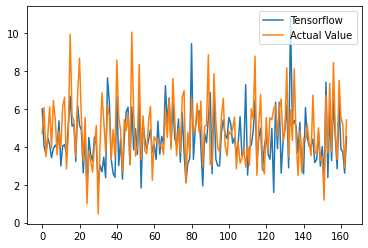

In [20]:
plt.plot(list(hasil_tf), label= "Tensorflow")
plt.plot(list(y_test), label = 'Actual Value')

plt.legend(loc='upper right')

In [21]:
len(data)

546